# Churn prediction project 
Using logical regression 

## 1. Data preparation
- Downloading the data, reading it with pandas
- Looking at the data
- Making column names and values to look uniform

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

!wget $data -O Churn.csv

--2025-10-14 00:08:15--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘Churn.csv’

Churn.csv           100%[===================>] 954.59K  1.27MB/s    in 0.7s    

2025-10-14 00:08:17 (1.27 MB/s) - ‘Churn.csv’ saved [977501/977501]



In [3]:
df = pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T # to view all the data - it transpose the data (change the rows to column)

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# Formating all the column and values of object datatype
df.columns = df.columns.str.lower().str.replace(" ", "_")
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
# changing datatype of total charges from object to numeric also, if it can't be changed then ignoring it (errors)
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce") 
df.totalcharges = df.totalcharges.fillna(0) # filling missing values with 0 

In [7]:
# changing the churn values to integer (yes to 1 and no to 0)
df.churn = (df.churn == "yes").astype(int)

## 2. Setting Up The Validation Framework
- Performing the train/validation/test split with Scikit-Learn

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# from the whole dataset - spliting it into 80% and 20% to full_train and test, having random state 1 for match outputs with the instructor
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# then from the that 80% (full_train) spliting it into further into train and validation
# spliting it such that the final split will be 60%, 20%, 20% so the 25% of the remaining 80% is 25% 
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [10]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3. EDA (Exploratory data analysis)
- Checking missing values
- Looking at the target variable (churn)
- Looking at numerical and categorical variables

In [11]:
# checking the % of churn users
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [12]:
global_churn_rate = (df_full_train.churn.mean())
global_churn_rate

np.float64(0.26996805111821087)

In [13]:
# splitting all the numarical and categorical values
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [14]:
df_full_train[categorical].nunique() # give number of all the unique values 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 4. Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information

In [15]:
female_churn = df_full_train[df_full_train.gender == "female"].churn.mean()
male_churn = df_full_train[df_full_train.gender == "male"].churn.mean()

female_churn, male_churn, global_churn_rate

(np.float64(0.27682403433476394),
 np.float64(0.2632135306553911),
 np.float64(0.26996805111821087))

In [16]:
partner_churn = df_full_train[df_full_train.partner == "yes"].churn.mean()
no_partner_churn = df_full_train[df_full_train.partner == "no"].churn.mean()

partner_churn, no_partner_churn

# this indicates that the partner varibale is more important for churn rate than gender as there is huge difference with having partner or not, rather than gender 

(np.float64(0.20503330866025166), np.float64(0.3298090040927694))

In [17]:
# now we will check for all the columns, which are key factors for churn rate 
# via difference(group - global) and risk (group / global)


from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 5. Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [18]:
# mutual info tells how much we learn about one from the other 
from sklearn.metrics import mutual_info_score

gender_mututal = mutual_info_score(df_full_train.gender, df_full_train.churn)
partner_mututal = mutual_info_score(df_full_train.partner, df_full_train.churn)

gender_mututal, partner_mututal
# the scores below tells us that partner tells more info with relation to churn than gender 

(0.0001174846211139946, 0.009967689095399745)

In [19]:
# now for all the categorical columns 
mi = {}
for c in categorical:
    mi[c] = mutual_info_score(df_full_train[c], df_full_train.churn)

pd.Series(mi).sort_values(ascending=False)
# the below shows that contract is one of the most important factor while the gender is the least

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 6.  Feature importance: Correlation
Now for numerical columns

In [20]:
# correlations of numarical columns with churn (maths apply of correlation coefficient)
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

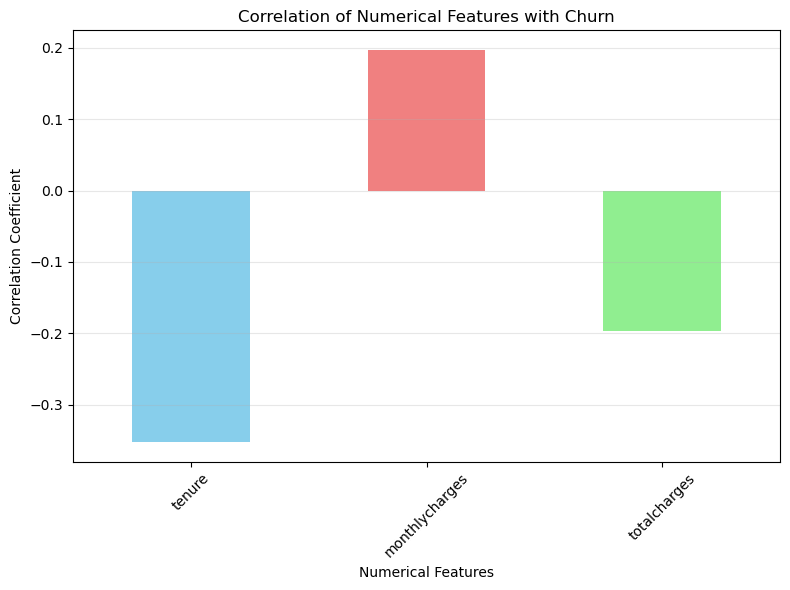

In [21]:
# Visualizing correlation of numerical columns with churn
correlations = df_full_train[numerical].corrwith(df_full_train.churn)

plt.figure(figsize=(8, 6))
correlations.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Correlation of Numerical Features with Churn')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# The below shows that as the tenuse increases the churn rate decrease and the opposite is trhe for the monthly charges (as the charges increases so the churn rate)


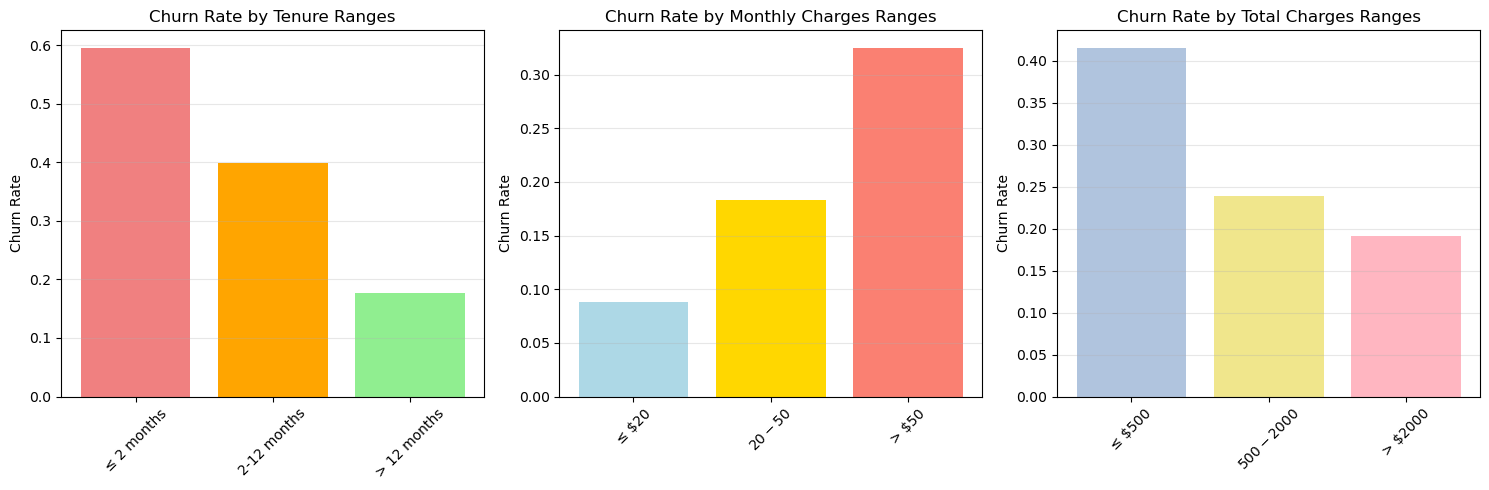

Tenure Ranges:
≤ 2 months: 0.5953
2-12 months: 0.3994
> 12 months: 0.1763

Monthly Charges Ranges:
≤ $20: 0.0880
$20-$50: 0.1834
> $50: 0.3250

Total Charges Ranges:
≤ $500: 0.4153
$500-$2000: 0.2382
> $2000: 0.1908


In [22]:
# Visualizing churn rates across different value ranges for numerical features

# Define ranges and calculate churn rates
tenure_ranges = {
    '≤ 2 months': df_full_train[df_full_train.tenure <= 2].churn.mean(),
    '2-12 months': df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean(),
    '> 12 months': df_full_train[df_full_train.tenure > 12].churn.mean()
}

monthly_charges_ranges = {
    '≤ $20': df_full_train[df_full_train.monthlycharges <= 20].churn.mean(),
    '$20-$50': df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean(),
    '> $50': df_full_train[df_full_train.monthlycharges > 50].churn.mean()
}

total_charges_ranges = {
    '≤ $500': df_full_train[df_full_train.totalcharges <= 500].churn.mean(),
    '$500-$2000': df_full_train[(df_full_train.totalcharges > 500) & (df_full_train.totalcharges <= 2000)].churn.mean(),
    '> $2000': df_full_train[df_full_train.totalcharges > 2000].churn.mean()
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot tenure ranges
axes[0].bar(tenure_ranges.keys(), tenure_ranges.values(), color=['lightcoral', 'orange', 'lightgreen'])
axes[0].set_title('Churn Rate by Tenure Ranges')
axes[0].set_ylabel('Churn Rate')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot monthly charges ranges
axes[1].bar(monthly_charges_ranges.keys(), monthly_charges_ranges.values(), color=['lightblue', 'gold', 'salmon'])
axes[1].set_title('Churn Rate by Monthly Charges Ranges')
axes[1].set_ylabel('Churn Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Plot total charges ranges
axes[2].bar(total_charges_ranges.keys(), total_charges_ranges.values(), color=['lightsteelblue', 'khaki', 'lightpink'])
axes[2].set_title('Churn Rate by Total Charges Ranges')
axes[2].set_ylabel('Churn Rate')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print the exact values
print("Tenure Ranges:")
for range_name, churn_rate in tenure_ranges.items():
    print(f"{range_name}: {churn_rate:.4f}")

print("\nMonthly Charges Ranges:")
for range_name, churn_rate in monthly_charges_ranges.items():
    print(f"{range_name}: {churn_rate:.4f}")

print("\nTotal Charges Ranges:")
for range_name, churn_rate in total_charges_ranges.items():
    print(f"{range_name}: {churn_rate:.4f}")

    # the below is the visualization across the values, one thing to notice is that the total charges seems counter inteutive as charges are increasing but the churn rate is decreasing, it is because those total charges are for long tenures, and as we no the tenure has a better correlation than total charges so it follows that 

## 7. One-hot encoding
Using Scikit-Learn to encode categorical features

In [35]:
from sklearn.feature_extraction import DictVectorizer

dicts = df_train[['gender', 'contract']].iloc[:20].to_dict(orient = "records")
dv = DictVectorizer(sparse=False)
dv.fit_transform(dicts), dv.get_feature_names_out()

# returning a matrix of 2 columns having some true values which are respectivily with feature names below

(array([[0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1.]]),
 array(['contract=month-to-month', 'contract=one_year',
        'contract=two_year', 'gender=female', 'gender=male'], dtype=object))

In [39]:
# now for all the columns 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


## 8. Logistic regression
- Binary classification
- Linear vs logistic regression


In [30]:
# Logistic regression is kind of similar to linear regression but it uses a special fn - Sigmoid 

# gives values between 0 and 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
z = np.linspace(-5, 5, 10) # gives 10 values between -5 and 5
sigmoid(z) 

array([0.00669285, 0.02005754, 0.0585369 , 0.1588691 , 0.36457644,
       0.63542356, 0.8411309 , 0.9414631 , 0.97994246, 0.99330715])

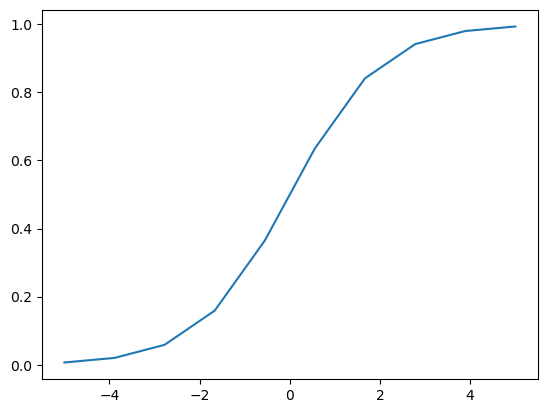

In [28]:
plt.plot(z, sigmoid(z))

In [32]:
# here's the difference between linear and logistic regression
def linear_regression(x):
    result = w0

    for j in range(len(w)):
        result += x[j] * w[j]

    return result

def logistic_regression(x):
    score = w0

    for j in range(len(w)):
        score += x[j] * w[j]

    result = sigmoid(score)
    return result

    

## 9. Training logistic regression with Scikit-Learn

- Training a model with Scikit-Learn
- Applying it to the validation dataset
- Calculating the accuracy

In [44]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
model.fit(X_train, y_train) #Scikit-Learn class for training the logistic regression model.

/home/manu/miniconda3/envs/ml-zoomcamp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
model.intercept_[0] # returns bias term

np.float64(-0.10894865415537554)

In [47]:
model.coef_[0] # returns the coefficients or weights of the LR model

array([ 4.74751744e-01, -1.74800449e-01, -4.07544444e-01, -2.97078970e-02,
       -7.78852512e-02,  6.26215658e-02, -8.88761907e-02, -8.13385233e-02,
       -3.42742765e-02, -7.33188717e-02, -3.35122263e-01,  3.16405305e-01,
       -8.88761907e-02,  3.67389792e-03, -2.57963951e-01,  1.41453173e-01,
        8.91762949e-03,  6.24755133e-02, -8.88761907e-02, -8.11924708e-02,
        2.65443198e-01, -8.88761907e-02, -2.84160155e-01, -2.31001470e-01,
        1.23408322e-01, -1.65974590e-01,  5.83814416e-02, -8.69770152e-02,
       -3.20218320e-02,  7.03425894e-02, -5.89368904e-02,  1.41453173e-01,
       -2.49046321e-01,  2.15401555e-01, -1.20364622e-01, -8.88761907e-02,
        1.01647665e-01, -7.09000515e-02, -8.88761907e-02,  5.21830939e-02,
        2.13217873e-01, -8.88761907e-02, -2.31934830e-01, -7.03446538e-02,
        3.81813532e-04])

In [50]:
# for accuracy 
# Get predicted probabilities for the positive class (churn = 1)
y_pred = model.predict_proba(X_val)[:, 1]
# Apply threshold of 0.5 to convert probabilities to binary predictions
churn_decision = (y_pred >= 0.5)
# Calculate accuracy by comparing predictions with actual values
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [ ]:
# another way 
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

# for the below table we are doing accuracy check 

,probability,prediction,actual,correct
0,0.009017,0,0,True
1,0.204786,0,0,True
2,0.212472,0,0,True
3,0.543019,1,1,True
4,0.214012,0,0,True
...,...,...,...,...
1404,0.313909,0,0,True
1405,0.039423,0,1,False
1406,0.136534,0,0,True
1407,0.799680,1,1,True


In [53]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

## 10. Model interpretation
- Looking at the coefficients
- Training a smaller model with fewer features

In [ ]:
# zap() fn use
a = [1, 2, 3, 4]
b = 'abcd'
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [57]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))) # feature names and there coeffeicent

{'contract=month-to-month': np.float64(0.475),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.062),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [59]:
# we will take a small subset of it 
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')
# taking first 10 values with our small features 

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
# creating small train and validation
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [64]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [66]:
# our all the features
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [68]:
X_train_small = dv_small.transform(dicts_train_small)

model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
w0 = model_small.intercept_[0]
w0 # bias value

np.float64(-2.4779575957976756)

In [72]:
w = model_small.coef_[0]
w.round(3) # weights

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [74]:
fw = dict(zip(dv_small.get_feature_names_out(), w.round(3)))
fw

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [83]:
# implementing formula - bais value + two_year_contract + 30 dollors monthly charges + tenure duration
w0 + (-0.948) + 30 * (0.027) + 24 * (-0.036)

np.float64(-3.4799575957976754)

In [85]:
sigmoid(_) # _ takes the above output and makes the fn input
# below is the % of chruning

np.float64(0.5074714211494942)

## 11. Using the model

In [89]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:1]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35}]

In [90]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [91]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/manu/miniconda3/envs/ml-zoomcamp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [93]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean() # our accuracy

np.float64(0.8147622427253371)

In [104]:
# let's test for a customer
customer = dicts_test[12]
customer

{'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 3,
 'monthlycharges': 70.3,
 'totalcharges': 235.5}

In [105]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0, 1]

np.float64(0.7412445242523324)

In [106]:

y_test[12]

np.int64(1)